In [1]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import timeit
import time
from multiprocessing import Pool
import numpy as np
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
ff=12
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

# Loading Data

In [2]:
path_codes='/mnt/sdb1/sandeep/5. NSF vs ERC/codes/'
path_data='/mnt/sdb1/sandeep/5. NSF vs ERC/data/' 
path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'



In [3]:
# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'
GB_INLCUDED_OR_NOT='GB_INCLUDED'

if GB_INLCUDED_OR_NOT=='GB_NOT_INCLUDED':
    with open(path_data+'df_NSF_combined_std_WITHOUT_some_cols.pkl', 'rb') as f:
        df_NSF_combined_std_WITHOUT_some_cols=pickle.load(f)   
    df_NSF_combined_std=df_NSF_combined_std_WITHOUT_some_cols


    with open(path_data+'df_ERC_load_not_UK.pkl', 'rb') as f:
        df_ERC_=pickle.load(f)   
    df_ERC_std=df_ERC_
elif GB_INLCUDED_OR_NOT=='GB_INCLUDED':
    with open(path_data+'df_NSF_combined_load_GB_included.pkl', 'rb') as f:
        df_NSF_combined_load_GB_included=pickle.load(f)   
    df_NSF_combined_std=df_NSF_combined_load_GB_included
    
    with open(path_data+'df_ERC_load.pkl', 'rb') as f:
        df_ERC_=pickle.load(f)   
    df_ERC_std=df_ERC_
else:
    print('ERROR---------------')









In [53]:
with open(path_data+'df_ERC_load_not_UK.pkl', 'rb') as f:
    df_ERC_notUK=pickle.load(f)   
with open(path_data+'df_ERC_load.pkl', 'rb') as f:
    df_ERC_withUK=pickle.load(f)   

In [54]:
df_ERC_notUK.shape[0]/df_ERC_withUK.shape[0]

0.8216737961071281

# Loading important stuff

In [4]:
path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'


with open(path_data+'df_ERC_scientist_award_details.pkl', 'rb') as f:
    df_ERC_scientist_award_details=pickle.load(f)   
T=df_ERC_scientist_award_details['Duration']
sci=df_ERC_scientist_award_details['Researcher (PI)']
dict_sci_award_year_ERC={}
it=1
for s,x in zip(sci,T):
    it=it+1
    print(it/len(T),end='\r')
    x_=int(x.split(',')[0].split(':')[1].lstrip().split('-')[0])
    if s in dict_sci_award_year_ERC.keys():
        if dict_sci_award_year_ERC[s]>x_:
            dict_sci_award_year_ERC[s]=x_
    else:
        dict_sci_award_year_ERC[s]=x_

df_ERC_std['grant_year']=df_ERC_std['scientist'].map(dict_sci_award_year_ERC)

# Sorting NSF sci by citation count/ money 

In [5]:

path_data='/mnt/sdb1/sandeep/5. NSF vs ERC/data/' 

with open(path_data+'dict_counts_NSF.pkl', 'rb') as f:
    dict_counts_NSF=pickle.load(f)   

len(dict_counts_NSF.keys())
for sci in dict_counts_NSF.keys():
    dict_counts_NSF[sci]=json.loads(dict_counts_NSF[sci])

with open(path_data+'dict_counts_ERC.pkl', 'rb') as f:
    dict_counts_ERC=pickle.load(f)   

len(dict_counts_ERC.keys())
for sci in dict_counts_ERC.keys():
    dict_counts_ERC[sci]=json.loads(dict_counts_ERC[sci])
path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'

with open(path_career+'dict_name_to_info_NSF.pkl', 'rb') as f:
    dict_name_to_info_NSF=pickle.load(f)    
path_codes='/mnt/sdb1/sandeep/5. NSF vs ERC/codes/'
path_data='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'       

with open(path_data+'df_NSF_grant_dates_money.pkl', 'rb') as f:
    df_NSF_grant_dates_money=pickle.load(f)      

#  Working with NSF GB Inlcuded


### ______citations befoer winning for NSF, so I can sort them


In [8]:
T=df_NSF_grant_dates_money['start_date']
sci=df_NSF_grant_dates_money['scientist']
dict_sci_award_year_NSF={}
it=1
for s,x in zip(sci,T):
    it=it+1
    print(it/len(T),end='\r')
    x_=int(x.split('/')[2].lstrip())
#     print(x_)
    
    if s in dict_sci_award_year_NSF.keys():
        if dict_sci_award_year_NSF[s]>x_:
            dict_sci_award_year_NSF[s]=x_
    else:
        dict_sci_award_year_NSF[s]=x_


In [52]:
# df_GY_nsf=df_NSF_combined_std.groupby(by='scientist').first()['grant_year']
# df_GY_nsf=pd.DataFrame(df_GY_nsf)
# dict_sci_award_year_NSF=df_GY_nsf['grant_year'].T.to_dict()

# it=0
# dict_counts_NSF_before_award={}
# for sci in dict_sci_award_year_NSF.keys():
#     it=it+1
#     print(it/len(dict_sci_award_year_NSF.keys()),end='\r')
#     if sci in dict_counts_NSF.keys():
#         c_t=dict_counts_NSF[sci]
#         if c_t!=None and c_t!='NA':

#             c_t={x['year']:{'works_count':x['works_count'],'cited_by_count':x['cited_by_count']} for x in c_t['counts_by_year']}
#             citations_total=0
#             works_total=0
#             for t in c_t.keys():
#                 if dict_sci_award_year_NSF[sci]<2012:
#                     YEAR_CIT=2013
#                 else:
#                     YEAR_CIT=dict_sci_award_year_NSF[sci]
#                 if t<=YEAR_CIT:
#                     citations_total+=c_t[t]['cited_by_count']
#                     works_total+=c_t[t]['works_count']
#         dict_counts_NSF_before_award[sci]=citations_total
    
# df_NSF_combined_std['citations_before_winning']=df_NSF_combined_std['scientist'].map(dict_counts_NSF_before_award)    

### ______count erc awardees by year and filter them


###  it yet remains for me to filter ERC winners by work counts.

## ERC winner per grant year

In [10]:
from collections import Counter
erc_award_counts=Counter(dict_sci_award_year_ERC.values())

Next I need to only keep scientist in this list in the datafram

## Disciplinewise assignment to scientists- erc and nsf

In [11]:

it=0
dict_NSF_disciplines_to_sci={}
for sci in dict_counts_NSF.keys():
    it=it+1
    print(it/len(dict_counts_NSF.keys()),end='\r')
    if (dict_counts_NSF[sci] is not None) and (dict_counts_NSF[sci] !="NA"):
        if len(dict_counts_NSF[sci]['x_concepts'])>0:
            for it_concept in range(len(dict_counts_NSF[sci]['x_concepts'])):
                if (dict_counts_NSF[sci]['x_concepts'][it_concept]['level']==0) and (dict_counts_NSF[sci]['x_concepts'][it_concept]['score']>=70):
                    dis__=dict_counts_NSF[sci]['x_concepts'][it_concept]['display_name']  
                    if dis__ in dict_NSF_disciplines_to_sci.keys():
                        dict_NSF_disciplines_to_sci[dis__].append(sci)
                    else:
                        dict_NSF_disciplines_to_sci[dis__]=[sci]



In [12]:

it=0
dict_ERC_disciplines_to_sci={}
for sci in dict_counts_ERC.keys():
    it=it+1
    print(it/len(dict_counts_ERC.keys()),end='\r')
    if (dict_counts_ERC[sci] is not None) and (dict_counts_ERC[sci] !="NA"):
        if len(dict_counts_ERC[sci]['x_concepts'])>0:
            for it_concept in range(len(dict_counts_ERC[sci]['x_concepts'])):
                if (dict_counts_ERC[sci]['x_concepts'][it_concept]['level']==0) and (dict_counts_ERC[sci]['x_concepts'][it_concept]['score']>=70):
                    dis__=dict_counts_ERC[sci]['x_concepts'][it_concept]['display_name']  
                    if dis__ in dict_ERC_disciplines_to_sci.keys():
                        dict_ERC_disciplines_to_sci[dis__].append(sci)
                    else:
                        dict_ERC_disciplines_to_sci[dis__]=[sci]


## filter NSF winners by citations
choose top x(t) for NSF from year t where x(t) is the number of erc_award_counts(t)

In [13]:
T=df_NSF_grant_dates_money['start_date']
M=df_NSF_grant_dates_money['AwardAmount']
sci=df_NSF_grant_dates_money['scientist']
dict_sci_award_year_NSF={}
dict_sci_award_money_NSF={}
it=1
for s,x,m in zip(sci,T,M):
    it=it+1
    print(it/len(T),end='\r')
    x_=int(x.split('/')[2].lstrip())
#     print(x_)
    
    if s in dict_sci_award_year_NSF.keys():
        if dict_sci_award_year_NSF[s]>x_:
            dict_sci_award_year_NSF[s]=x_
            dict_sci_award_money_NSF[s]=m
    else:
        dict_sci_award_year_NSF[s]=x_
        dict_sci_award_money_NSF[s]=m


In [14]:
df_NSF_combined_std['grant_year']=df_NSF_combined_std['scientist'].map(dict_sci_award_year_NSF)
df_NSF_2008_2022=df_NSF_combined_std[df_NSF_combined_std['grant_year']>2007]

In [15]:
df_NSF_2008_2022['AwardAmount']=df_NSF_2008_2022['scientist'].map(dict_sci_award_money_NSF)
df_NSF_2008_2022['AwardAmount']=df_NSF_2008_2022['AwardAmount'].astype('int')


<ipython-input-15-7f98f11c9d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['AwardAmount']=df_NSF_2008_2022['scientist'].map(dict_sci_award_money_NSF)
<ipython-input-15-7f98f11c9d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['AwardAmount']=df_NSF_2008_2022['AwardAmount'].astype('int')


In [ ]:
dict_NSF2008_2021={}
NSF_top_X=[]
for year in range(2008,2022):
    dict_NSF2008_2021[year]=df_NSF_2008_2022[df_NSF_2008_2022['grant_year']==year]
    X=dict_NSF2008_2021[year].groupby(['scientist']).first()['citations_before_winning']
    df__=pd.DataFrame(list(X.values),list(X.index))
    df__=df__.sort_values(0,ascending=False)
    NSF_top_X=NSF_top_X+list(df__.index[0:erc_award_counts[year]])
    print(df__.shape,erc_award_counts[year])
dict_sci_in={sci:1 for sci in NSF_top_X}
# df_NSF_combined_std['sci_in']=df_NSF_combined_std['scientist'].map(dict_sci_in)    
df_NSF_2008_2022['sci_in']=df_NSF_2008_2022['scientist'].map(dict_sci_in)

In [21]:
    
# df_NSF_top_x=df_NSF_2008_2022[df_NSF_2008_2022['sci_in']==1]


### filter NSF by award amount

In [22]:
# df_NSF_2008_2022.iloc[x:x+50]
NSF_top_Xm=[]
for year in range(2008,2022):
    dict_NSF2008_2021[year]=df_NSF_2008_2022[df_NSF_2008_2022['grant_year']==year]
    X=dict_NSF2008_2021[year].groupby(['scientist']).first()['AwardAmount']
    df__=pd.DataFrame(list(X.values),list(X.index))
    df__=df__.sort_values(0,ascending=False)
    NSF_top_Xm=NSF_top_X+list(df__.index[0:erc_award_counts[year]])
    print(df__.shape,erc_award_counts[year])
dict_sci_inm={sci:1 for sci in NSF_top_Xm}
# df_NSF_combined_std['sci_in']=df_NSF_combined_std['scientist'].map(dict_sci_in)    
df_NSF_2008_2022['sci_in_money']=df_NSF_2008_2022['scientist'].map(dict_sci_inm)


(3617, 1) 326
(3900, 1) 388
(3329, 1) 550
(4009, 1) 721
(4320, 1) 871
(3838, 1) 843
(3737, 1) 785
(3941, 1) 848
(3867, 1) 1024
(3591, 1) 1093
(3545, 1) 1079
(3355, 1) 1038
(3517, 1) 933
(1312, 1) 742


<ipython-input-22-c1a5b7aa142c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['sci_in_money']=df_NSF_2008_2022['scientist'].map(dict_sci_inm)


In [23]:
df_NSF_top_x_money=df_NSF_2008_2022[df_NSF_2008_2022['sci_in_money']==1]


#  Data : Imprtant Numbers

In [24]:
df_ERC_std['grant_year'].min()

2008.0

In [25]:
df_ERC_std.groupby('scientist').count().shape

(7299, 19)

In [26]:
df_NSF_2008_2022.groupby('scientist').count().shape

(49944, 14)

In [27]:
# df_NSF_2008_2022[df_NSF_2008_2022['scientist']=='Annalisa Bracco'].iloc[0:50]


In [28]:
# ERC numbers by starting, consolidator, advanced
x_missing=1
df_NSF2=df_NSF_2008_2022[df_NSF_2008_2022['keep']==True]
df=df_NSF2[df_NSF2['identified_countries']>0]
df=df[df['team_size']-df['identified_countries']<=x_missing]
df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
nsf_static_values_no_filter=df['frac_cross']
nsf_static_no_filter=np.mean(df['frac_cross'])


# Fig 1 : Statis erc vs nsf

In [29]:
def fig1():
# def fig1(df_NSF_top_x):
    it_p=0;ff=14;it_p+=1;
    alpha=.7;width=.4;
    xx1=0;xx2=.5
    import scipy 
    import scipy
    from scipy import stats
    it_p=0



    x_missing=1
#     df_NSF2=df_NSF_top_x[df_NSF_top_x['keep']==True]
#     df=df_NSF2[df_NSF2['identified_countries']>0]
#     df=df[df['team_size']-df['identified_countries']<=x_missing]
#     df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
#     nsf_static_values=df['frac_cross']
#     nsf_static=np.mean(nsf_static_values)
#     nsf_static_av_by_sci=np.mean(df.groupby('scientist').mean()['frac_cross'])


    df_=df_ERC_std[df_ERC_std['keep']==True]
    df_=df_[df_['identified_countries']>0]
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
    df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_static_values=df_['frac_cross']
    erc_static=np.mean(erc_static_values)
    erc_static_av_by_sci=np.mean(df_.groupby('scientist').mean()['frac_cross'])


    df_NSF2=df_NSF_2008_2022[df_NSF_2008_2022['keep']==True]
    df=df_NSF2[df_NSF2['identified_countries']>0]
    df=df[df['team_size']-df['identified_countries']<=x_missing]
    df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf_static_values_no_filter=df['frac_cross']
    nsf_static_no_filter=np.mean(df['frac_cross'])

#     df_NSF2=df_NSF_top_x[df_NSF_top_x['keep']==True]
#     df=df_NSF2[df_NSF2['identified_countries']>0]
#     df=df[df['team_size']-df['identified_countries']<=x_missing]
#     df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
#     nsf_static_values_no_filter=df['frac_cross']
#     nsf_static_no_filter=np.mean(df['frac_cross'])


    #______________________________________________________


    #______________________________________________________
    # fig = plt.figure(0,figsize=(3, 4));
    # ax = fig.add_subplot(1, 1, 1);
    # x_leg=.5;y_leg=1;

    # ax.bar(xx1,nsf_static*100,width=.3,color='indianred',label=r'${%\ of\ EU\ coauthors\ per\ paper\ of\ NSF\ winners}$',alpha=alpha)
    # ax.bar(xx2,erc_static*100,width=.3,color='royalblue',label=r'${%\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)
    # ax.set_xticks([xx1, xx2])
    # ax.set_xticklabels(['NSF', 'ERC'])
    # simpleaxis(ax)
    # plt.xticks(fontsize=ff)
    # ax.set_yticks([0,2,4,6])
    # ax.set_ylabel('% of cross-continental coauthors per paper',fontsize=ff)

    # # ax.set_xticks([])
    # # ax.legend(bbox_to_anchor=(x_leg,y_leg),frameon=False,fontsize=ff*1);
    # plt.savefig(path_codes+'figs/fig1_static.png',dpi=300, bbox_inches = "tight")
    # # print(round((erc_static-nsf_static)/erc_static*100,2),'% more US collaborations by ERC winners (only top NSF)','\n\n')
    # print(round((nsf_static-erc_static)/nsf_static*100,2),'% more US collaborations by ERC winners (only top NSF)','\n\n')

    # # print(scipy.stats.ks_2samp(erc_static_values, nsf_static_values))
    #______________________________________________________
    fig = plt.figure(1,figsize=(3, 4));
    ax = fig.add_subplot(1, 1, 1);
    x_leg=.5;y_leg=1;
    ax.bar(xx1,nsf_static_no_filter*100,width=.3,color='indianred',label=r'${%\ of\ EU\ coauthors\ per\ paper\ of\ NSF\ winners}$',alpha=alpha)
    ax.bar(xx2,erc_static*100,width=.3,color='royalblue',label=r'${%\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)
    ax.set_xticks([xx1, xx2])
    ax.set_xticklabels(['NSF', 'ERC'])
    ax.set_yticks([0,2,4,6])

    ax.set_ylabel('% of cross-continental \ncoauthors per paper',fontsize=ff)
    simpleaxis(ax)
    plt.xticks(fontsize=ff)

    # ax.legend(bbox_to_anchor=(x_leg,y_leg),frameon=False,fontsize=ff*1);



    #_________________
    # statistical annotation
    x1, x2 = 0.05, .95   # columns ;
    y, h, col = 5.2, .2, 'black'
    # ax.plot( [x1, x1, x2, x2],[y, y+h, y+h, y], lw=1.5, c=col)
    # txt_=round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more US collaborations \nbefore winning grant'
    txt_=str(round((erc_static-nsf_static_no_filter)/nsf_static_no_filter*100,2))+'% more US\n collaborations by\n ERC winners'


    # ax.text((x1+x2)*.7 ,y+h*2, txt_, ha='right', va='top', color=col, fontsize=ff-3.5)
    plt.savefig(path_codes+'figs/fig1_static_no_filter.png',dpi=300, bbox_inches = "tight")

    # print(round((erc_static-nsf_static_no_filter)/erc_static*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')
    print(round((nsf_static_no_filter-erc_static)/nsf_static_no_filter*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')

    print('--------------------------------------------------------------')


    #______________________________________________________
    # fig = plt.figure(1,figsize=(2, 2));
    # ax = fig.add_subplot(1, 1, 1);
    # x_leg=.5;y_leg=1;
    # ax.bar(0,nsf_static_av_by_sci*100,width=.4,color='indianred',label=r'${%\ of\ EU\ coauthors\ per\ paper\ of\ NSF\ winners}$',alpha=alpha)
    # ax.bar(1,erc_static_av_by_sci*100,width=.4,color='royalblue',label=r'${%\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)
    # simpleaxis(ax)
    # ax.set_xticks([])
    # # ax.legend(bbox_to_anchor=(x_leg,y_leg),frameon=False,fontsize=ff*1);
    # plt.savefig(path_codes+'figs/fig1_static_av_by_sci.png',dpi=300, bbox_inches = "tight")
    # print(round((erc_static_av_by_sci-nsf_static_av_by_sci)/erc_static_av_by_sci*100,2),'% more US collaborations by ERC winners','\n\n')

    print(scipy.stats.ks_2samp(erc_static_values*100, nsf_static_values_no_filter*100))
    return nsf_static_values_no_filter*100,erc_static_values*100
    #_______________________________
    # new=erc_static-nsf_static_no_filter
    # orig=erc_static-nsf_static
    # orig
    # print(round((orig-new)/orig*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')
    # print(erc_static,nsf_static)

-12.67 % more US collaborations by ERC winners (no filter on NSF) 


--------------------------------------------------------------
KstestResult(statistic=0.032779324096823714, pvalue=0.0)
6.336963608650704 7.139825930276983


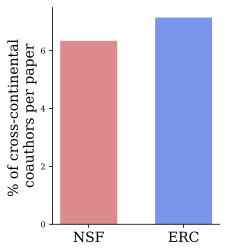

In [30]:
nsf_,erc_=fig1()
print(np.mean(nsf_),np.mean(erc_))

with open(path_data+'fig1_nsf_values_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(nsf_, f)    S
with open(path_data+'fig1_erc_values_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(erc_, f)
    

In [31]:
# import pickle
# # with open(path_data+'fig1_nsf_values.pkl', 'rb') as f:
# #     nsf_=pickle.load(f)   
# with open(path_data+'fig1_erc_values.pkl', 'rb') as f:
#     erc_=pickle.load(f)   

In [32]:
pval=1/449909
pval

2.222671695831824e-06

# Fig 2: cross-colab by career age

In [34]:
import numpy as np
age_bins=np.arange(1,20,1)
age_bins=[[x,x+3] for x in age_bins]


CHOICE_OF_NSF=1
if CHOICE_OF_NSF==1:
    df_NSF2=df_NSF_2008_2022[df_NSF_2008_2022['keep']==True]
else:
    df_NSF2=df_NSF_top_x[df_NSF_top_x['keep']==True]

nsf=[]
erc=[]
nsf_var=[]
erc_var=[]
nsf_N=[]
erc_N=[]
nsf_by_sci=[]
erc_by_sci=[]
nsf_var_by_sci=[]
erc_var_by_sci=[]
nsf_N_by_sci=[]
erc_N_by_sci=[]

x_missing=1
for it_ages in range(len(age_bins)):
#     l_=age_bins[it_ages];r_=age_bins[it_ages+1];
    l_=age_bins[it_ages][0];r_=age_bins[it_ages][1];
    print(it_ages,'----- ',l_,' to ',r_,end='\r')
#     df=df_NSF2.copy()
    df=df_NSF2[df_NSF2['identified_countries']>0]
    df=df[df['keep']==True]
    df=df[df['team_size']-df['identified_countries']<=x_missing]
    df=df[(df['career_age']<r_)&(df['career_age']>=l_)]   
    df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf.append(np.mean(np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))))
    nsf_var.append(np.var(np.divide(np.array(df['n_US']),np.array(df['identified_countries']))))
    nsf_N.append(df['n_US'].shape[0])
    nsf_by_sci.append(np.mean(df.groupby('scientist').mean()['frac_cross']))
    nsf_var_by_sci.append(np.var((df.groupby('scientist').mean()['frac_cross'])))
    nsf_N_by_sci.append(df.groupby('scientist').mean()['frac_cross'].shape[0])
    

    df_=df_ERC_std[df_ERC_std['keep']==True]
    df_=df_[(df_['career_age']<r_)&(df_['career_age']>=l_)]
    df_=df_[df_['identified_countries']>0]
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
    df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc.append(np.mean(np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))))
    erc_var.append(np.var(np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))))
    erc_N.append(df_['n_US'].shape[0])
    erc_by_sci.append(np.mean(df_.groupby('scientist').mean()['frac_cross']))
    erc_var_by_sci.append(np.var((df_.groupby('scientist').mean()['frac_cross'])))
    erc_N_by_sci.append(df_.groupby('scientist').mean()['frac_cross'].shape[0])
    


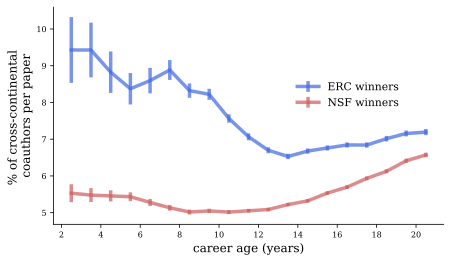

In [35]:
fig = plt.figure(0,figsize=(7, 4));
ax = fig.add_subplot(1, 1, 1);
ini_=0
alpha=.7;
ff=12
lw=3.5
ms=2
xxxx=[x[0]/2+x[1]/2 for x in age_bins]
# ax.plot(xxxx[ini_:],erc[ini_:],'-',markersize=ms,lw=lw,color='royalblue',alpha=alpha)
y=100*np.array(erc[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(erc_var[ini_:],.5),np.power(erc_N[ini_:],0.5))
ax.errorbar(x, y, y_err , mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='royalblue',ecolor='royalblue',alpha=alpha,label=r'ERC winners')


y=100*np.array(nsf[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(nsf_var[ini_:],.5),np.power(nsf_N[ini_:],0.5))
ax.errorbar(x,y,y_err , mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='indianred',ecolor='indianred',alpha=alpha,label=r'NSF winners')


# ci = 1.96 * np.std(y)/np.sqrt(len(y))
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)


# ff=10

labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xlabel('career age (years)',fontsize=ff*1)
ax.set_ylabel('% of cross-continental \ncoauthors per paper',fontsize=ff*1)

ax.set_xticks(np.linspace(2,20,10))
ax.legend(bbox_to_anchor=(.6,.7),frameon=False,fontsize=ff*.9)
plt.xticks(fontsize=ff-4)
plt.yticks(fontsize=ff-4)

simpleaxis(ax)


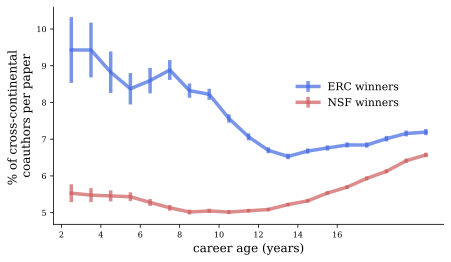

In [36]:
fig = plt.figure(0,figsize=(7, 4));
ax = fig.add_subplot(1, 1, 1);
ini_=0
lw=3.5
ms=2
xxxx=[x[0]/2+x[1]/2 for x in age_bins]
# ax.plot(xxxx[ini_:],erc[ini_:],'-',markersize=ms,lw=lw,color='royalblue',alpha=alpha)
y=100*np.array(erc[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(erc_var[ini_:],.5),np.power(erc_N[ini_:],0.5))
ax.errorbar(x, y, y_err , mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='royalblue',ecolor='royalblue',alpha=alpha,label=r'ERC winners')

with open(path_data+'fig2_y_erc_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(y, f)    
with open(path_data+'fig2_yerr_erc_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(y_err, f)    
with open(path_data+'fig2_x_erc_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(x, f)    


    
# ci = 1.96 * np.std(y)/np.sqrt(len(y))
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

# ax.plot(xxxx[ini_:],nsf[ini_:],'-',markersize=ms,lw=lw,color='indianred',alpha=alpha)
y=100*np.array(nsf[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(nsf_var[ini_:],.5),np.power(nsf_N[ini_:],0.5))
ax.errorbar(x,y,y_err , mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='indianred',ecolor='indianred',alpha=alpha,label=r'NSF winners')
with open(path_data+'fig2_y_nsf_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(y, f)    
with open(path_data+'fig2_yerr_nsf_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(y_err, f)    
with open(path_data+'fig2_x_nsf_vs_age_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(x, f)    


# ci = 1.96 * np.std(y)/np.sqrt(len(y))
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)


# ff=10

labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xlabel('career age (years)',fontsize=ff*1)
ax.set_ylabel('% of cross-continental \ncoauthors per paper',fontsize=ff*1)

ax.set_xticks(np.linspace(2,16,8))
ax.legend(bbox_to_anchor=(.6,.7),frameon=False,fontsize=ff*.9)
plt.xticks(fontsize=ff-4)
plt.yticks(fontsize=ff-4)

simpleaxis(ax)
plt.savefig(path_codes+'figs/fig2_collab_vs_age.png',dpi=300, bbox_inches = "tight");

# #_--------------------------------
# fig = plt.figure(1,figsize=(4, 2));
# ax = fig.add_subplot(1, 1, 1);
# ini_=0
# alpha=.8
# lw=2
# ms=2
# # ax.plot(xxxx[ini_:],erc[ini_:],'-',markersize=ms,lw=lw,color='royalblue',alpha=alpha)
# ax.errorbar(xxxx[ini_:], 100*np.array(erc_by_sci[ini_:]), 100*np.divide(np.power(erc_var_by_sci[ini_:],.5),np.power(erc_N_by_sci[ini_:],0.5)), mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='royalblue',ecolor='royalblue',alpha=alpha,label=r'${fraction\ of\ US\ coauthors\ per\ ERC\ winner}$')

# # ax.plot(xxxx[ini_:],nsf[ini_:],'-',markersize=ms,lw=lw,color='indianred',alpha=alpha)
# ax.errorbar(xxxx[ini_:], 100*np.array(nsf_by_sci[ini_:]), 100*np.divide(np.power(nsf_var_by_sci[ini_:],.5),np.power(nsf_N_by_sci[ini_:],0.5)), mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='indianred',ecolor='indianred',alpha=alpha,label=r'${fraction\ of\ EU\ coauthors\ per\ NSF\ winner}$')

# # ff=10

# labels = [item.get_text() for item in ax.get_xticklabels()]

# ax.set_xlabel('career age (years)',fontsize=ff*1)
# ax.set_xticks(np.linspace(1,16,8))
# ax.legend(bbox_to_anchor=(.2,.9),frameon=False,fontsize=ff*1)
# simpleaxis(ax)


In [ ]:
# df_ERC_scientist_award_details_not_UK=df_ERC_scientist_award_details[df_ERC_scientist_award_details['Country']!='United Kingdom']



In [ ]:
# df_ERC_['not_UK']=df_ERC_['scientist'].map(dict_ERC_not_UK)
# df_ERC_not_UK=df_ERC_[df_ERC_['not_UK']==True]

# Fig 3: ERC -- frac US before vs after


In [37]:
df_ERC_std['grant_year']=df_ERC_std['scientist'].map(dict_sci_award_year_ERC)
x=(df_ERC_std['pub_year']-df_ERC_std['grant_year'])
df_ERC_std['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 


df=df_ERC_std[df_ERC_std['identified_countries']>0]
df=df[df['team_size']-df['identified_countries']<=x_missing]
df['frac_US']=df['n_US']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_erc=[];out_erc=[]
for sci,in_grant in res_.index:
#     print(sci,in_grant)
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:

        if in_grant==5:
            in_erc.append(res_.loc[sci,in_grant]['frac_US'])
        elif in_grant==-5:
            out_erc.append(res_.loc[sci,in_grant]['frac_US'])
    

 

In [38]:
df_NSF_2008_2022['grant_year']=df_NSF_2008_2022['scientist'].map(dict_sci_award_year_NSF)
x=(df_NSF_2008_2022['pub_year']-df_NSF_2008_2022['grant_year'])
df_NSF_2008_2022['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
                                                                 
                                                                 
df=df_NSF_2008_2022[df_NSF_2008_2022['identified_countries']>0]
df=df[df['team_size']-df['identified_countries']<=x_missing]
df['frac_EU']=df['n_EU']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_nsf=[];out_nsf=[]
for sci,in_grant in res_.index:
#     print(sci,in_grant)
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:

        if in_grant==5:
            in_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
        elif in_grant==-5:
            out_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
    


<ipython-input-38-c2d3e42139d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['grant_year']=df_NSF_2008_2022['scientist'].map(dict_sci_award_year_NSF)
<ipython-input-38-c2d3e42139d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5))


In [41]:
import seaborn as sns

def plot_before_after(in_erc,out_erc,in_nsf,out_nsf):
    dict_data={'ERC':[in_erc,out_erc],'NSF':[in_nsf,out_nsf]}
    
    df_=pd.DataFrame(); 
    df_['x']=[]
    df_['']=[]
    row_=0
    for award in dict_data.keys():
        it_=-1
        for data_ in dict_data[award]:
            it_+=1
            df_=df_.append(pd.DataFrame(data_))
            rows_=pd.DataFrame(data_).shape[0]
            if it_==0:
                df_['x'].iloc[row_:row_+rows_]='during grant'
            else:
                df_['x'].iloc[row_:row_+rows_]='before grant'
            df_[''].iloc[row_:row_+rows_]=award

            row_=row_+rows_
    df_.columns=['x','','frac_cross']
    meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
    ax=sns.barplot(x=df_['x'],y=df_['frac_cross']*100,hue=df_[''])

    ylab_=''
    ax.set_ylabel('% US coauthors\n per ERC winner')#,fontsize=ff)
    ax.set_xlabel('')#,fontsize=ff)
    ax.set_yticks(np.array([0,4,8,12]))
    #plt.xticks(fontsize=ff)
#     trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
#     ax.text(-0.35, .95, 'c)', transform=ax.transAxes,# + trans,
#                 fontsize=label_ff, va='bottom', fontfamily='serif')
    sns.despine(offset=10, trim=True)
    return df_
 


<ipython-input-41-3ffabcfaabe6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-41-3ffabcfaabe6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[''].iloc[row_:row_+rows_]=award
<ipython-input-41-3ffabcfaabe6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-41-3ffabcfaabe6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['x'].ilo

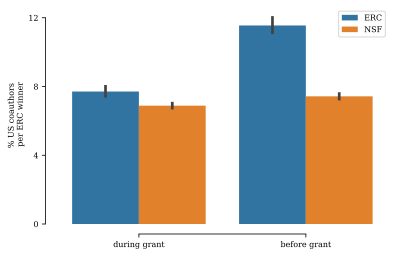

In [42]:
df_=plot_before_after(in_erc,out_erc,in_nsf,out_nsf)
with open(path_data+'fig3_df_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(df_, f)   

In [43]:
# import distinctipy
# # import seaborn as sns
# import seaborn as sns
# bins_=101
# colors_=distinctipy.get_colors(10)
# palette={'before grant':colors_[6],'during grant':colors_[5]}
# palette={'before grant':'lightgreen','during grant':'green'}

# fig = plt.figure(0,figsize=(4, 4));
# ax = fig.add_subplot(1, 1,1);
# # violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
# # ff=15

# df_=pd.DataFrame(); it_=-1;row_=0
# df_['x']=[]
# for data_ in [out_,in_]:
#     it_+=1
#     df_=df_.append(pd.DataFrame(data_))
#     rows_=pd.DataFrame(data_).shape[0]
#     if it_==1:
#         df_['x'].iloc[row_:row_+rows_]='during grant'
#     else:
#         df_['x'].iloc[row_:row_+rows_]='before grant'
#     row_=row_+rows_
# df_.columns=['x','frac_US']
# meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
# import matplotlib as mpl
# ax=sns.boxplot(x=df_['x'],y=df_['frac_US']*100,width=.3,showfliers=False,medianprops=meanlineprops,palette=palette);


# ylab_=''
# ax.set_ylabel('% US collaborations by ERC winners',fontsize=ff)
# ax.set_xlabel('',fontsize=ff)
# ax.set_yticks(np.array([0,.1,.2,.3])*100)
# plt.xticks(fontsize=ff)

    
# # xlab_=r"diversity of white's first move"
# sns.despine(offset=10, trim=True)
# ax.tick_params(axis='y', which='major', labelsize=ff)
# ax.tick_params(axis='x', which='major', labelsize=ff)

        
# simpleaxis(ax)
# plt.xticks(fontsize=ff)




# d1=df_[df_['x']=='during grant']['frac_US']
# d2=df_[df_['x']=='before grant']['frac_US']
# import scipy
# print(scipy.stats.ks_2samp(d1, d2),'\n\n')
# print(round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more US collaborations before winning grant','\n\n')


# #_________________
# # statistical annotation
# x1, x2 = 0.05, .95   # columns ;
# y, h, col = df_['frac_US'].max()*15, 1, 'black'
# # ax.plot( [x1, x1, x2, x2],[y, y+h, y+h, y], lw=1.5, c=col)
# pval_13_plot=scipy.stats.ks_2samp(d1, d2)[1]
# Dstat=scipy.stats.ks_2samp(d1, d2)[0]
# # pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value='+str(round(pval_13_plot,4))
# pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value=e'+(str(pval_13_plot).split('e')[1])
# # ax.text((x1+x2)*.8 ,y+h*.5, pval_13_plot, ha='right', va='top', color=col, fontsize=ff-4)
# print(pval_13_plot)
# txt_=round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more US collaborations \nbefore winning grant'
# # ax.text((x1+x2)*.7 ,y+h*1, txt_, ha='right', va='top', color=col, fontsize=ff-3.5)
# plt.savefig(path_codes+'figs/fig3_before_during.png',dpi=300, bbox_inches = "tight");




# Fig 4: disciplinwise analysis

In [ ]:
# top_dis_by_sci=df_NSF_top_x.groupby(['discipline','scientist']).count()
# top_dis_by_sci

In [ ]:
# top_dis_sizes={x[0]:top_dis_by_sci.loc[x[0]].shape[0] for x in top_dis_by_sci.index}

In [ ]:
# top_dis_sizes
# from collections import Counter
# x = Counter(top_dis_sizes)
# x=x.most_common()
# top_disciplines_sci=[y[0] for y in x]
# top_disciplines_sci_counts=[y[1] for y in x]

In [44]:
# top_dis=df_NSF_top_x.groupby('discipline').count().sort_values('scientist',ascending=False)
# df_NSF_combined_std['discipline']=df_NSF_combined_std['scientist'].map(dict_NSF_disciplines)    
dict_disci_count={}
dict_map_sci_dis_NSF={}
dict_map_sci_dis_ERC={}
for dis in dict_NSF_disciplines_to_sci.keys():
    dict_map_sci_dis_NSF[dis]={}
    for sci in dict_NSF_disciplines_to_sci[dis]:
        dict_map_sci_dis_NSF[dis][sci]=1
    dict_map_sci_dis_ERC[dis]={}
    for sci in dict_ERC_disciplines_to_sci[dis]:
        dict_map_sci_dis_ERC[dis][sci]=1
    dict_disci_count[dis]=len(dict_NSF_disciplines_to_sci[dis])
    
x=Counter(dict_disci_count).most_common()
print(x)
top20disciplines=[y[0] for y in x]
top20disciplines_counts=[y[1] for y in x]



# top20disciplines=list(top_dis.iloc[0:20].index)

# top20disciplines_counts=list(top_dis.iloc[0:20,1])

[('Biology', 29755), ('Physics', 24794), ('Chemistry', 20832), ('Computer science', 19144), ('Engineering', 13918), ('Medicine', 11818), ('Geology', 10766), ('Mathematics', 10682), ('Materials science', 10350), ('Psychology', 8044), ('Geography', 6826), ('Political science', 4274), ('Economics', 4102), ('Sociology', 3697), ('Environmental science', 3662), ('Philosophy', 2503), ('History', 1983), ('Business', 1453), ('Art', 730)]


In [45]:
CHOICE_OF_NSF=1
if CHOICE_OF_NSF==1:
    df_NSF2=df_NSF_2008_2022[df_NSF_2008_2022['keep']==True]
else:
    df_NSF2=df_NSF_top_x[df_NSF_top_x['keep']==True]

dict_df_NSF_dis={}
dict_df_ERC_dis={}
dict_df_NSF_dis_by_sci={}
dict_df_ERC_dis_by_sci={}
pd.options.mode.chained_assignment = None  # default='warn'

it=0
for dis in top20disciplines:
    it+=1
    print(it,'---',dis,end='\r')
    df_NSF2['discipline']=df_NSF2['scientist'].map(dict_map_sci_dis_NSF[dis])
    df_ERC_std['discipline']=df_ERC_std['scientist'].map(dict_map_sci_dis_ERC[dis])
    dict_df_NSF_dis[dis]=df_NSF2[df_NSF2['discipline']==1]
    dict_df_ERC_dis[dis]=df_ERC_std[df_ERC_std['discipline']==1]
# for dis in top_disciplines_sci:
#     it+=1
#     print(it,'---',dis,end='\r')
#     dict_df_NSF_dis_by_sci[dis]=df_NSF_top_x[df_NSF_top_x['discipline']==dis]
#     dict_df_ERC_dis_by_sci[dis]=df_ERC_std[df_ERC_std['discipline']==dis]
        

In [46]:

erc_static_dis={}
nsf_static_dis={}
erc_static_by_sci_dis={}
nsf_static_by_sci_dis={}
it=0
for dis in top20disciplines:
    print(it,'---',dis,end='\r')
    it_p=0;it+=1



    x_missing=1
    df=dict_df_NSF_dis[dis][dict_df_NSF_dis[dis]['identified_countries']>0]
    df=df[df['keep']==True]
    df=df[df['team_size']-df['identified_countries']<=x_missing]
    df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf_static_by_sci_dis[dis]=(np.mean(df.groupby('scientist').mean()['frac_cross']))
    nsf_static_values_dis=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf_static_dis[dis]=np.mean(nsf_static_values_dis)

    df_=dict_df_ERC_dis[dis][dict_df_ERC_dis[dis]['keep']==True]
    df_=df_[df_['identified_countries']>0]
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
    df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_static_by_sci_dis[dis]=(np.mean(df_.groupby('scientist').mean()['frac_cross']))
    erc_static_values_dis=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_static_dis[dis]=np.mean(erc_static_values_dis)

    
# it=0
# for dis in top_disciplines_sci:
#     print(it,'---',dis,end='\r')
#     it_p=0;it+=1
#     df_NSF2=df_NSF_top_x[df_NSF_top_x['keep']==True]

#     x_missing=1
#     df=dict_df_NSF_dis[dis][dict_df_NSF_dis[dis]['identified_countries']>0]
#     df=df[df['keep']==True]
#     df=df[df['team_size']-df['identified_countries']<=x_missing]
#     df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
#     nsf_static_by_sci_dis[dis]=(np.mean(df.groupby('scientist').mean()['frac_cross']))
# #     nsf_static_values_dis=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
# #     nsf_static_dis[dis]=np.mean(nsf_static_values_dis)

#     df_=dict_df_ERC_dis[dis][dict_df_ERC_dis[dis]['keep']==True]
#     df_=df_[df_['identified_countries']>0]
#     df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
#     df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
#     erc_static_by_sci_dis[dis]=(np.mean(df_.groupby('scientist').mean()['frac_cross']))
# #     erc_static_values_dis=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
# #     erc_static_dis[dis]=np.mean(erc_static_values_dis)




['Biology', 'Physics', 'Chemistry', 'Computer science', 'Engineering', 'Medicine', 'Geology', 'Mathematics', 'Materials science', 'Psychology', 'Geography', 'Political science', 'Economics', 'Sociology', 'Environmental science']


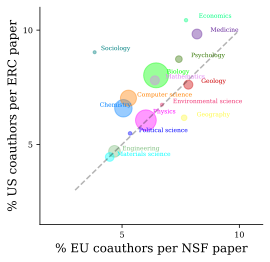

In [47]:
from distinctipy import distinctipy

# ______________________________________________________

it_p=0;it_p+=1;
alpha=.8;width=.4;
# ff=13

# ______________________________________________________
fig = plt.figure(0,figsize=(4, 4));
ax = fig.add_subplot(1, 1, 1);
x_leg=1;y_leg=.5;
ndis=15
colors_=distinctipy.get_colors(ndis+1)

xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
yy={x_:1.01 for x_ in top20disciplines[0:ndis]}
# yy['Biology']=.9;xx['Biology']=.9
# yy['Computer science']=.85;xx['Computer science']=.1
# yy['Psychology']=.98;xx['Psychology']=1.02
yy['Physics']=1.05;xx['Physics']=1.05
# yy['Chemistry']=;
xx['Chemistry']=.8
# yy['Engineering']=1.01;xx['Engineering']=1
# yy['Materials science']=.95;xx['Materials science']=1.1
# yy['Political science']=.95;xx['Political science']=1
# yy['Geography']=.99;xx['Geography']=1.05
# yy['Geology']=.99;xx['Geology']=1.05

sign=1
for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
    size_=top20disciplines_counts[it]/max(top20disciplines_counts)
#     size_=size_**0.5
    ax.plot(100*nsf_static_dis[dis],100*erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.4,color=colors_[it])
    ax.annotate(dis, [100*nsf_static_dis[dis]*xx[dis],100*erc_static_dis[dis]*yy[dis]],fontsize=ff-6,color=colors_[it])

ax.plot([3,100*max(erc_static_dis.values())-4],[3,100*max(erc_static_dis.values())-4],'--',color='black',label=r'balanced',alpha=.3)
# ax.set_facecolor('azure')

xx=1.5;yy=11
ax.set_xticks([0,5,10]);
ax.set_yticks([0,5,10]);
ax.set_xlim([xx,yy]);
ax.set_ylim([xx,yy]);
ax.set_xlabel('% EU coauthors per NSF paper',fontsize=ff);
ax.set_ylabel('% US coauthors per ERC paper',fontsize=ff);
# ax.legend(bbox_to_anchor=(.95,1),frameon=False,fontsize=ff*1,ncol=1);
simpleaxis(ax)
plt.savefig(path_codes+'figs/fig4_disciplinewise.png',dpi=300, bbox_inches = "tight")
# print(round((erc_static-nsf_static)/erc_static*100,2),'% more US collaborations by ERC winners','\n\n')
print(top20disciplines[0:ndis])
# #_________________
# print(scipy.stats.ks_2samp(erc_static_values, nsf_static_values))

In [48]:
# for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
#     size_=top20disciplines_counts[it]/max(top20disciplines_counts)
#     size_=size_**0.5
#     100*nsf_static_dis[dis],100*erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.2,color=colors_[it])
#     ax.annotate(dis, [100*nsf_static_dis[dis]*xx[dis],100*erc_static_dis[dis]*yy[dis]],fontsize=ff-6,color=colors_[it])


In [49]:
store_colors={dis: color for dis,color in zip(top20disciplines[0:ndis],colors_)}

In [50]:
dict_size_of_disciplines_top={x:y for x,y in zip(top20disciplines,top20disciplines_counts)}
nsf_disciplinewise={dis:100*nsf_static_dis[dis] for dis in dict_size_of_disciplines_top.keys()}
erc_disciplinewise={dis:100*erc_static_dis[dis] for dis in dict_size_of_disciplines_top.keys()}
with open(path_data+'fig4_dict_size_of_disciplines_top_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(dict_size_of_disciplines_top, f)   
with open(path_data+'fig4_nsf_disciplinewise_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(nsf_disciplinewise, f) 
with open(path_data+'fig4_erc_disciplinewise_'+GB_INLCUDED_OR_NOT+'.pkl', 'wb') as f:
    pickle.dump(erc_disciplinewise, f) 

In [51]:
fig4_dict_size_of_disciplines_top_

NameError: name 'fig4_dict_size_of_disciplines_top_' is not defined

In [ ]:
nsf_disciplinewise

In [ ]:

# # ______________________________________________________

# it_p=0;ff=5;it_p+=1;
# alpha=.5;width=.4;

# # ______________________________________________________
# fig = plt.figure(0,figsize=(2, 2));
# ax = fig.add_subplot(1, 1, 1);
# x_leg=1;y_leg=.5;
# ndis=10
# from distinctipy import distinctipy
# x10=13

# cols_=distinctipy.get_colors(ndis+x10)
# xx={x_:1.07 for x_ in top_disciplines_sci[0:ndis]};
# yy={x_:1.01 for x_ in top_disciplines_sci[0:ndis]}
# # yy['Biology']=.9;xx['Biology']=.9
# # yy['Computer science']=.85;xx['Computer science']=.1
# # yy['Psychology']=.9;xx['Psychology']=1.07
# # yy['Physics']=1.05;xx['Physics']=1.05
# # yy['Chemistry']=1.15;xx['Chemistry']=.5
# # yy['Engineering']=.6;xx['Engineering']=.1
# # yy['Materials science']=.95;xx['Materials science']=1.1
# # yy['Political science']=.8;xx['Political science']=1.1
# # yy['Geography']=.7;xx['Geography']=1.05


# for dis,it in zip(top_disciplines_sci[0:ndis],range(0,ndis)):
#     size_=top_disciplines_sci_counts[it]/max(top_disciplines_sci_counts)
#     ax.plot(100*nsf_static_by_sci_dis[dis],100*erc_static_by_sci_dis[dis],'o',ms=30*size_,label=dis,alpha=alpha,color=cols_[it+x10-5])
#     ax.plot(100*nsf_static_by_sci_dis[dis],100*erc_static_by_sci_dis[dis],'.',ms=2,alpha=1,color=cols_[it+x10-5])
#     ax.annotate(dis, [100*nsf_static_by_sci_dis[dis]*xx[dis],100*erc_static_by_sci_dis[dis]*yy[dis]],fontsize=ff,color=cols_[it+x10-5])

# ax.plot([.4,100*max(erc_static_by_sci_dis.values())],[.4,100*max(erc_static_by_sci_dis.values())],'--',color='black',label=r'balanced',alpha=.2)


# ax.set_xticks([5,10]);
# ax.set_xlim(3,100*max(erc_static_by_sci_dis.values())+1);
# ax.set_ylim(3,100*max(erc_static_by_sci_dis.values())+1);
# ax.set_xlabel('% EU collabs by NSF');
# ax.set_ylabel('% US collabs by ERC');
# ax.set_yticks([5,10]);
# # ax.legend(bbox_to_anchor=(.95,1),frameon=False,fontsize=ff*1,ncol=1);
# simpleaxis(ax)
# plt.savefig(path_codes+'figs/fig4_disciplinewise_by_sci.png',dpi=300, bbox_inches = "tight")
# # print(round((erc_static-nsf_static)/erc_static*100,2),'% more US collaborations by ERC winners','\n\n')
# print(top_disciplines_sci[0:ndis])

# # #_________________
# # print(scipy.stats.ks_2samp(erc_static_values, nsf_static_values))

# SI: cross-colab by grant type

In [275]:

erc_vs_grant_type=[]


# for it_ages in range(len(age_bins)-1):
for erc_type in [1,2,3]:
    print(erc_type)
    
    df_=df_ERC_std[df_ERC_std['keep']==True]
    df_=df_[df_['identified_countries']>0]    
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
    ls=list(df_['type'])
    x=[erc_type in x for x in ls]
    df_['grant_type']=x
    df_=df_[df_['grant_type']==True]
    df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_vs_grant_type.append(np.nanmean(df_['frac_cross']))




1
2
3


[7.67, 7.28, 6.93]


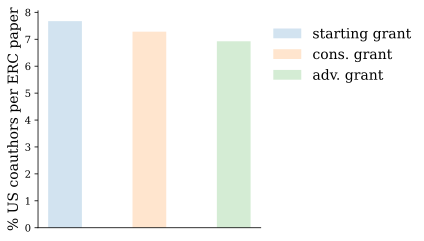

In [287]:
fig = plt.figure(0,figsize=(4, 4));
ax = fig.add_subplot(1, 1, 1);

alpha=.2
width=2
ax.bar(0,np.array(erc_vs_grant_type[0]*100),width=width,label=r'starting grant',alpha=alpha)
ax.bar(5,np.array(erc_vs_grant_type[2]*100),width=width,label=r'cons. grant',alpha=alpha)
ax.bar(10,np.array(erc_vs_grant_type[1]*100),width=width,label=r'adv. grant',alpha=alpha)
# ax.bar(np.array(age_bins[0:-1])+width/2,np.array(nsf),width=width,color='indianred',label=r'${fraction\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)

# ax.set_xticks(age_bins[0:-1],)
labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_ylabel('% US coauthors per ERC paper',fontsize=ff*1)
ax.set_xticks([])
ax.legend(bbox_to_anchor=(1,.98),frameon=False,fontsize=ff*1)
simpleaxis(ax)
print([round(erc_vs_grant_type[x] *100,2) for x in [0,2,1]])
# plt.savefig(path_codes+'figs/fig1c.png',dpi=300, bbox_inches = "tight");

In [635]:
# import pandas as pd
# import plotly.graph_objs as go
# from random import uniform as unif

# df = pd.DataFrame({"categories":"First Height Points Nominal_Value Price Number1 Number2".split(" "),
#                    "weight":[unif(0,1) for i in range(7)]})
# rose_chart1(df)


# Fig SI: US grants: Before or After
US career is pushed by EU funds as atleast 40% of ERC funded papers have aleast 1 cross-continetal paper. EU careers are pushed?

In [28]:
# df_NSF_2008_2022
from distinctipy import distinctipy
df_NSF_2008_2022

,scientist,team_size,pub_year,identified_countries,n_US,n_EU,subtract_from_n_US,keep,type,first_pub_date,career_age,grant_year,citations_before_winning,sci_in,AwardAmount,before_after
1184413,A Joshua West,5,2001,2,1,0,0,False,-1,2001,0,2011,188.0,NaN,294751,0
1184414,A Joshua West,3,2001,2,0,0,0,False,-1,2001,0,2011,188.0,NaN,294751,0
1184412,A Joshua West,4,2002,3,0,0,0,False,-1,2001,1,2011,188.0,NaN,294751,0
1184411,A Joshua West,1,2003,1,0,0,0,False,-1,2001,2,2011,188.0,NaN,294751,0
1184410,A Joshua West,3,2004,3,0,0,0,False,-1,2001,3,2011,188.0,NaN,294751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508821,zach dwiel,3,2019,3,3,0,0,False,-1,2016,3,2020,32.0,NaN,256000,-5
508822,zach dwiel,8,2019,7,6,0,0,False,-1,2016,3,2020,32.0,NaN,256000,-5
508823,zach dwiel,4,2019,4,4,0,0,False,-1,2016,3,2020,32.0,NaN,256000,-5
508824,zach dwiel,8,2019,7,6,0,0,False,-1,2016,3,2020,32.0,NaN,256000,-5


In [15]:
df_NSF_2008_2022['grant_year']=df_NSF_2008_2022['scientist'].map(dict_sci_award_year_NSF
x=(df_NSF_2008_2022['pub_year']-df_NSF_2008_2022['grant_year'])
df_NSF_2008_2022['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 


<ipython-input-15-96c802aab432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['grant_year']=df_NSF_2008_2022['scientist'].map(dict_sci_award_year_NSF
<ipython-input-15-96c802aab432>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NSF_2008_2022['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5))


In [17]:
# frac_EU
x_missing=1

In [27]:
# df=df_NSF_2008_2022[df_NSF_2008_2022['identified_countries']>0]
# df=df[df['team_size']-df['identified_countries']<=x_missing]
# df['frac_EU']=df['n_EU']/df['identified_countries']
# res_=df.groupby(['scientist','before_after']).mean()
# in_nsf=[];out_nsf=[]
# for sci,in_grant in res_.index:
# #     print(sci,in_grant)
#     if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:

#         if in_grant==5:
#             in_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
#         elif in_grant==-5:
#             out_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
    

 


In [57]:
print(np.mean(out_nsf),np.mean(in_nsf))

0.04862855119167281 0.04387449262245297


<ipython-input-60-db07ceae562b>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-60-db07ceae562b>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-60-db07ceae562b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['x'].iloc[row_:row_+rows_]='during grant'


KstestResult(statistic=0.09954441235148737, pvalue=2.6704845275530052e-145) 


10.84 % more EU collaborations before winning grant 




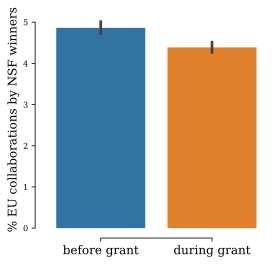

In [60]:
import seaborn as sns
bins_=101
ff=12
colors_=distinctipy.get_colors(10)
palette={'before grant':colors_[6],'during grant':colors_[5]}
palette={'before grant':'lightgreen','during grant':'green'}

fig = plt.figure(0,figsize=(4, 4));
ax = fig.add_subplot(1, 1,1);
# violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
# ff=15

df_=pd.DataFrame(); it_=0;row_=0
df_['x']=[]
for data_ in [out_nsf,in_nsf]:
    df_=df_.append(pd.DataFrame(data_))
    rows_=pd.DataFrame(data_).shape[0]
    if it_==1:
        df_['x'].iloc[row_:row_+rows_]='during grant'
    else:
        df_['x'].iloc[row_:row_+rows_]='before grant'
    row_=row_+rows_
    it_+=1
df_.columns=['x','frac_EU']
meanlineprops = dict(linestyle='-', linewidth=2.5, color='white',alpha=.5)
import matplotlib as mpl
ax=sns.barplot(x=df_['x'],y=df_['frac_EU']*100);


ylab_=''
ax.set_ylabel('% EU collaborations by NSF winners',fontsize=ff)
ax.set_xlabel('',fontsize=ff)
# ax.set_yticks(np.array([0,.1,.2,.3])*100)
plt.xticks(fontsize=ff)

    
# xlab_=r"diversity of white's first move"
sns.despine(offset=10, trim=True)
ax.tick_params(axis='y', which='major', labelsize=ff)
ax.tick_params(axis='x', which='major', labelsize=ff)

        
simpleaxis(ax)
plt.xticks(fontsize=ff)




d1=df_[df_['x']=='during grant']['frac_EU']
d2=df_[df_['x']=='before grant']['frac_EU']
import scipy
print(scipy.stats.ks_2samp(d1, d2),'\n\n')
print(round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more EU collaborations before winning grant','\n\n')


#_________________
# statistical annotation
x1, x2 = 0.05, .95   # columns ;
y, h, col = df_['frac_EU'].max()*15, 1, 'black'
# ax.plot( [x1, x1, x2, x2],[y, y+h, y+h, y], lw=1.5, c=col)
pval_13_plot=scipy.stats.ks_2samp(d1, d2)[1]
Dstat=scipy.stats.ks_2samp(d1, d2)[0]
# pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value='+str(round(pval_13_plot,4))
# pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value=e'+(str(pval_13_plot).split('e')[1])
# ax.text((x1+x2)*.8 ,y+h*.5, pval_13_plot, ha='right', va='top', color=col, fontsize=ff-4)
# print(pval_13_plot)
# txt_=round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more EU collaborations \nbefore winning grant'
# ax.text((x1+x2)*.7 ,y+h*1, txt_, ha='right', va='top', color=col, fontsize=ff-3.5)
# plt.savefig(path_codes+'figs/fig_before_during_US.png',dpi=300, bbox_inches = "tight");


In [65]:
df_[df_['x']=='before grant']['frac_EU'].mean()*100

4.862855119167281

In [64]:
df_[df_['x']=='during grant']['frac_EU'].mean()*100

4.387449262245298

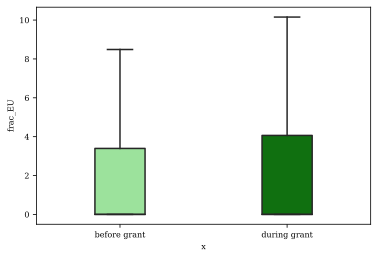

In [25]:
ax=sns.boxplot(x=df_['x'],y=df_['frac_EU']*100,width=.3,showfliers=False,palette=palette);


# Fig SI: atleast one US coauthor

US career is pushed by EU funds as atleast 40% of ERC funded papers have aleast 1 cross-continetal paper. EU careers are pushed?

In [31]:
def figSI():
    x_missing=1
    import scipy 
    df_=df_ERC_std[df_ERC_std['keep']==True]
    df_=df_[df_['identified_countries']>0]
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
#     df_=df_[df_['identified_countries']>1]
    erc_static=np.sum(df_['n_US']>0)/df_.shape[0]


    df_NSF2=df_NSF_2008_2022[df_NSF_2008_2022['keep']==True]
    df=df_NSF2[df_NSF2['identified_countries']>0]
    df=df[df['team_size']-df['identified_countries']<=x_missing]
#     df=df[df['identified_countries']>1]
    nsf_static_no_filter=np.sum(df['n_EU']>0)/df.shape[0]

    #______________________________________________________

    it_p=0;ff=14;it_p+=1;
    alpha=.7;width=.4;
    xx1=0;xx2=.5
  
    #______________________________________________________
    fig = plt.figure(1,figsize=(3, 4));
    ax = fig.add_subplot(1, 1, 1);
    x_leg=.5;y_leg=1;
    ax.bar(xx1,nsf_static_no_filter*100,width=.3,color='indianred',label=r'${%\ of\ EU\ coauthors\ per\ paper\ of\ NSF\ winners}$',alpha=alpha)
    ax.bar(xx2,erc_static*100,width=.3,color='royalblue',label=r'${%\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)
    ax.set_xticks([xx1, xx2])
    ax.set_xticklabels(['NSF', 'ERC'])
    ax.set_yticks([0,2,4,6])

    ax.set_ylabel('% of cross-continental \ncoauthors per paper',fontsize=ff)
    simpleaxis(ax)
    plt.xticks(fontsize=ff)

    # ax.legend(bbox_to_anchor=(x_leg,y_leg),frameon=False,fontsize=ff*1);



    #_________________
    # statistical annotation
    x1, x2 = 0.05, .95   # columns ;
    y, h, col = 5.2, .2, 'black'
    # ax.plot( [x1, x1, x2, x2],[y, y+h, y+h, y], lw=1.5, c=col)
    # txt_=round((np.mean(d2)-np.mean(d1))/np.mean(d1)*100,2),'% more US collaborations \nbefore winning grant'
    txt_=str(round((erc_static-nsf_static_no_filter)/nsf_static_no_filter*100,2))+'% more US\n collaborations by\n ERC winners'


    # ax.text((x1+x2)*.7 ,y+h*2, txt_, ha='right', va='top', color=col, fontsize=ff-3.5)
    plt.savefig(path_codes+'figs/fig1_static_no_filter.png',dpi=300, bbox_inches = "tight")

    # print(round((erc_static-nsf_static_no_filter)/erc_static*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')
    print(round((nsf_static_no_filter-erc_static)/nsf_static_no_filter*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')

    print('--------------------------------------------------------------')

    print('erc---',erc_static)
    print('nsf no filter---',nsf_static_no_filter)

    #_________________
    #______________________________________________________
    # fig = plt.figure(1,figsize=(2, 2));
    # ax = fig.add_subplot(1, 1, 1);
    # x_leg=.5;y_leg=1;
    # ax.bar(0,nsf_static_av_by_sci*100,width=.4,color='indianred',label=r'${%\ of\ EU\ coauthors\ per\ paper\ of\ NSF\ winners}$',alpha=alpha)
    # ax.bar(1,erc_static_av_by_sci*100,width=.4,color='royalblue',label=r'${%\ of\ US\ coauthors\ per\ paper\ of\ ERC\ winners}$',alpha=alpha)
    # simpleaxis(ax)
    # ax.set_xticks([])
    # # ax.legend(bbox_to_anchor=(x_leg,y_leg),frameon=False,fontsize=ff*1);
    # plt.savefig(path_codes+'figs/fig1_static_av_by_sci.png',dpi=300, bbox_inches = "tight")
    # print(round((erc_static_av_by_sci-nsf_static_av_by_sci)/erc_static_av_by_sci*100,2),'% more US collaborations by ERC winners','\n\n')

    print(scipy.stats.ks_2samp(erc_static_values*100, nsf_static_values_no_filter*100))

    #_______________________________
    # new=erc_static-nsf_static_no_filter
    # orig=erc_static-nsf_static
    # orig
    # print(round((orig-new)/orig*100,2),'% more US collaborations by ERC winners (no filter on NSF)','\n\n')
    # print(erc_static,nsf_static)

# Significant correlation between citations before NSF award and Award money

In [38]:
XXXX=df_NSF_2008_2022.groupby('scientist').first()

In [39]:
from scipy import stats
x=np.array(list(XXXX['citations_before_winning']))
y=np.array(list(XXXX['AwardAmount']))
x1 = x[np.where((~np.isnan(x)) & (~np.isnan(y)))]
y1 = y[np.where((~np.isnan(x)) & (~np.isnan(y)))]
print(stats.spearmanr(x1,y1))

SpearmanrResult(correlation=0.21980966617686717, pvalue=0.0)


In [498]:
1/XXXX.shape[0]

2.4576666912433335e-05

In [33]:
# figSI()


### Are young ERC winners collaborating with older US scientist and vice-versa?

# Average age for each award type ERC


In [42]:
df=df_ERC_std[df_ERC_std['identified_countries']>0]
df=df[df['team_size']-df['identified_countries']<=x_missing]
df=df[df['keep']==True]
# res_=df.groupby(['scientist','before_after']).mean()
# res_=df.groupby(['scientist','before_after']).mean()


In [43]:
x=df.groupby(['scientist']).first()
x['award_age']=x['grant_year']-x['first_pub_date']
x['type']=[y[0] for y in x['type']]

In [44]:
z=x.groupby(['type']).mean()

In [45]:
z['award_age']

type
1    12.390494
2    27.531871
3    16.361546
4    21.852747
5    28.287879
Name: award_age, dtype: float64

In [633]:
# import pandas as pd
# from random import uniform as uni
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.graph_objs import Data as Data

# df = pd.DataFrame({"etiquetas":["a","b","c","d","e","f"],
#                    "pesos":[uni(0.4,1) for i in range(6)]})

# def rose_chart1(df):
#     traces = []
#     df_ = df.pivot(columns = "etiquetas",values="pesos")
#     for ind,meta in df_.iterrows():
#         trace = {
#               "name": meta.index[ind], 
#               "r": meta.values, 
#               "type": "barpolar", 
#               "opacity": 1, 
#               "theta": df_.columns.values, 
#               "hoverinfo": "r+theta",
#               "opacity" : 0.68
#               }
#         traces.append(trace)
#     layout = {
#       "font": {
#         "size": 16, 
#         "family": "Overpass"
#       }, 
#       "polar": {
#         "hole": 0.0, 
#         "bargap": 0.05,  ## % del total que no se toma en cada area
#         "radialaxis": {
#           "visible":True,
#           "type": "linear", 
#           "title": {"text": "<br>"}, 
#           "tickmode": "auto", 
#           "tickfont": {"size": 14}, 
#           "autorange": True, 
#           "gridwidth": 2,  # ancho de las lineas radiales
#           "linewidth": 0
#         }, 
#         "angularaxis": {
#           "type": "category", 
#           "ticklen": 12, 
#           "tickmode":"auto",
#           "tickfont": {"color": "rgb(22, 22, 22)"}, 
#           "direction": "counterclockwise", 
#           "gridwidth": 2, 
#           "tickwidth": 1, 
#           "tickprefix": ""
#         }
#       }, 
#       "title": {"text": "Contribución en pesos de las variables"}, 
#       "xaxis": {
#         "range": [-1, 6], 
#         "autorange": True
#       }, 
#       "yaxis": {
#         "range": [-1, 4], 
#         "autorange": True
#       }, 
#       "legend": {
#         "x": 1, 
#         "y": 1, 
#         "font": {
#           "size": 14, 
#           "family": "Roboto"
#         }, 
#         "title": {
#           "font": {
#             "size": 16, 
#             "color": "rgb(67, 36, 167)", 
#             "family": "Overpass"
#           }, 
#           "text": "Variables"
#         }, 
#         "xanchor": "auto", 
#         "itemsizing": "trace", 
#         "traceorder": "normal", 
#         "borderwidth": 0, 
#         "orientation": "v"
#       }, 
#       "modebar": {
#         "color": "rgba(68, 68, 68, 0.3)", 
#         "bgcolor": "rgba(118, 6, 6, 0.5)", 
#         "orientation": "h"
#       }, 
#       "autosize": True, 
#       "template": {
#         "data": {
#           "bar": [
#             {
#               "type": "bar", 
#               "marker": {"colorbar": {
#                   "len": 0.2, 
#                   "ticks": "inside", 
#                   "ticklen": 6, 
#                   "tickcolor": "rgb(237,237,237)", 
#                   "outlinewidth": 0
#                 }}
#             }
#           ], 
#           "carpet": [
#             {
#               "type": "carpet", 
#               "aaxis": {
#                 "gridcolor": "white", 
#                 "linecolor": "white", 
#                 "endlinecolor": "rgb(51,51,51)", 
#                 "minorgridcolor": "white", 
#                 "startlinecolor": "rgb(51,51,51)"
#               }, 
#               "baxis": {
#                 "gridcolor": "white", 
#                 "linecolor": "white", 
#                 "endlinecolor": "rgb(51,51,51)", 
#                 "minorgridcolor": "white", 
#                 "startlinecolor": "rgb(51,51,51)"
#               }
#             }
#           ], 
#         }, 
#         "layout": {
#           "geo": {
#             "bgcolor": "white", 
#             "showland": True, 
#             "lakecolor": "white", 
#             "landcolor": "rgb(237,237,237)", 
#             "showlakes": True, 
#             "subunitcolor": "white"
#           }, 
#           "font": {"color": "rgb(51,51,51)","family": "Overpass"}, 
#           "polar": {
#             "bgcolor": "rgb(237,237,237)", 
#             "radialaxis": {
#               "ticks": "outside", 
#               "showgrid": True, 
#               "gridcolor": "white", 
#               "linecolor": "white", 
#               "tickcolor": "rgb(51,51,51)"
#             },
#           },   
#           "hovermode": "closest", 
#           "plot_bgcolor": "rgb(237,237,237)", 
#           "paper_bgcolor": "white", 
#           "shapedefaults": {
#             "line": {"width": 0}, 
#             "opacity": 0.3, 
#             "fillcolor": "black"}, 
#           "annotationdefaults": {
#             "arrowhead": 0, 
#             "arrowwidth": 1}
#         }
#       }, 
#       "radialaxis": {"ticksuffix": "%"}, 
#       "separators": ", ", 
#       "orientation": 0
#     }    

#     data = Data(traces)
#     fig = go.Figure(data,layout)
#     fig.show()

In [ ]:
# from sklearn.neighbors import KernelDensity

# #------------------------------------------------------
# bins_=151

# colors = ['navy', 'darkorange','red', 'cornflowerblue']
# nn=bins_

# store_for_test=[]

# fig = plt.figure(0,figsize=(4, 2));

# L_=10

# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# ax = fig.add_subplot(1, 1,1);
# store_for_test=[]
# store_Y=[]
# bb=50
# colors__=[]
# line_stlye__=[]

# xxx=.002
# lab_=[]

# line_stlye='--'
# # high_ind=np.where((elos__in_use>ELO_bins_[it_bin])\
# #                   &(elos__in_use<ELO_bins_[it_bin+1])\
# #                   &(elos__in_use>-1))
# # high_ind=high_ind[0]
# X=np.subtract(in_,out_)
# X=X[~np.isnan(X) & ~np.isinf(X)]
# store_for_test.append(X)
# X=X.reshape(-1, 1)
# p_=ax.hist(X,bins_,color='indianred',alpha=.3,density=True);
# ax.axvline(x=X.mean(),ls='--',color='indianred')
# # ax.set_yscale('log')
# kde = KernelDensity(kernel='gaussian', bandwidth=.05).fit(X[0:100000])
# s = np.linspace(-.4,.3,101)
# log_dens = kde.score_samples(s.reshape(-1,1))
# ax.plot(s,np.exp(log_dens),'-',color='indianred',alpha=.8)    

# ax.set_xlim([-.4,.3])
# # ylab_=r"$\frac{n^{emp}(\ell_{hotstreak} \geq L)}{n^{null}(\ell_{hotstreak} \geq L)}$"
# # ylab_=r"$a_{last\ game\ of\ streak} - a_{game\ which\ broke\ the\ streak}$"
# xlab_=r"frac. US (during grant) - frac. US (before grant)"
# ylab_=r'pdf'
# ff=10
# ax.set_xlabel(xlab_,fontsize=ff)
# ax.set_ylabel(ylab_,fontsize=ff);
# # ax.set_title(r"rating advantage over opponent and game outcome",fontsize=ff);
# ax.legend(loc='upper left',ncol=1,bbox_to_anchor=(.65, 1.1),fontsize=ff,frameon=False);
# ax.axvline(x=0,ls='--',color='k')

# simpleaxis(ax)
# ax.set_yticks([])
# # plt.savefig(path_codes+'figs/fig1c.png',dpi=300, bbox_inches = "tight");
